In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist # dataset

In [2]:
mnist_data = mnist.load_data() # output is a tuple of train and test data in shape of ((x_train, y_train), (x_test, y_test))
# so we can extract the data like this
(x_train, y_train), (x_test, y_test) = mnist_data
# scale the color range which is between [0,255]
# if I divide the color by 255, the range will reduce to [0,1]
x_train, x_test = x_train/255, x_test/255
# check the shape, the default shape of the image was 28x28
print('Shape of x_train:', x_train.shape) # we can see that we have 60k samples of 28x28 images
print('Shape of x_test:', x_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of x_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


In [0]:
# Let's create the model
model = tf.keras.models.Sequential([
  # First we need to flatten the images, there's a layer called Flatten for this
  tf.keras.layers.Flatten(input_shape = (28,28)),
  # We have 128 hidden layers (# of hidden layers is hyperparameter) with ReLU activation function.
  # since the output of one neuron will be the input for the next neuron
  # we dont need to use something like sigmoid to scale the outputs as 
  # probabilities. 
  # Using ReLU (Rectifier linear unit) is a better choice
  # because it doesn't lead us to vanishing gradient problem
  # Also there's different activation functions such as ELU (Exponential linear unit)
  # and LReLU (Leaky ReLU), LReLU adds very small positive slope for negative inputs
  # negative values in ReLU isn't possible because the gradient for 
  # negative values is 0.
  # also ReLU can't be centered at zero which is kinda bad, 
  # BUT THE RULE OF THIS FIELD IS "IF IT WORKS, DONT TOUCH IT!"
  # So it's not that important if it works good. 
  tf.keras.layers.Dense(128, activation = 'relu'),
  # This layer drops out few nodes randomly to make the ANN learn from neurons equally
  # Since it drops out random nodes, the model will learn less from dominant nodes
  # also the 0.2 means theres 20% chance to drop a node
  tf.keras.layers.Dropout(0.2),
  # this is the last layer, which will have 10 output since we have 10 digits in the problem,
  # also using softmax activation function because its a multiclass classification problem, softmax function is a kinda generalized version of sigmoid
  # which allows us to do classification with K class, which also includes 2. So we can also use this to make a normal binary classification
  tf.keras.layers.Dense(10, activation = 'softmax')
])

# compile the model, i'll be using sparse categorical cross entropy
# READ MORE: 
# https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
# https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c
# https://www.reddit.com/r/MLQuestions/comments/93ovkw/what_is_sparse_categorical_crossentropy/

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [4]:
# fit the model. Use less epochs because we have 60k samples 
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2976 - accuracy: 0.9144 - val_loss: 0.1387 - val_accuracy: 0.9585
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1443 - accuracy: 0.9574 - val_loss: 0.1049 - val_accuracy: 0.9672
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1078 - accuracy: 0.9674 - val_loss: 0.0875 - val_accuracy: 0.9746
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.0794 - val_accuracy: 0.9758
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9765 - val_loss: 0.0769 - val_accuracy: 0.9776
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0736 - val_accuracy: 0.9787
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.0735 - val_accuracy:

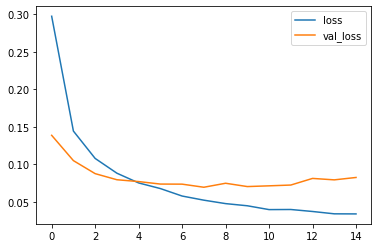

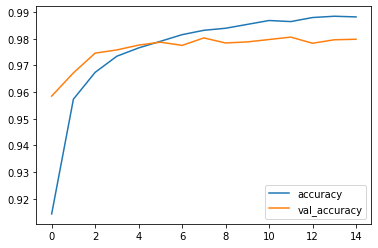

In [5]:
# Plot the loss and accuracy
# Loss
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
# Accuracy
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [6]:
# Evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9798


[0.08240175992250443, 0.9797999858856201]

In [0]:
# Making the predictions
# since the output will be the array in shape of (10,) which will have the probabilities of every digit. We gotta get the maximum probability from it
# Also the output is something like
# [[x1,x2,x3, ... ,x9, x10]
# [x1,x2,x3, ... ,x9, x10]
# [x1,x2,x3, ... ,x9, x10]
# [x1,x2,x3, ... ,x9, x10]]
# So I'll get the maximum of every row with argmax method and axis=1 argument | argmax with axis = 1 -> get the most likely class from a row
p_test = model.predict(x_test).argmax(axis = 1)

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

Confusion matrix, without normalization
[[ 968    0    3    1    0    0    4    1    2    1]
 [   0 1124    3    1    0    0    2    1    4    0]
 [   3    0 1015    2    2    0    3    4    3    0]
 [   0    0    4  982    0   13    0    5    1    5]
 [   1    0    4    1  963    0    3    0    1    9]
 [   2    0    0    2    1  877    2    1    4    3]
 [   4    2    3    1    3    5  939    0    1    0]
 [   1    2   11    2    1    0    0 1001    1    9]
 [   6    0    6    2    5    3    2    5  942    3]
 [   0    4    0    1   10    3    0    4    0  987]]


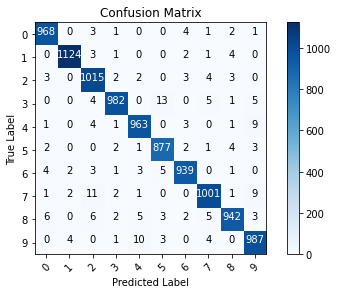

In [9]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

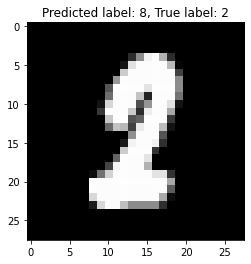

In [24]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0] # returns a tuple of array with an array and null element because I only passed a condition. So get the first element to receive the misclassified examples
sample = np.random.choice(misclassified_idx)
plt.imshow(x_test[sample], cmap = 'gray') # all the images are in grayscale
plt.title('Predicted label: {}, True label: {}'.format(p_test[sample], y_test[sample]))
plt.show()
# Well, even I misclassified some of them